## Visualization Script for MongoDB Data

In [791]:
import pymongo
import pprint as p
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [792]:
client = pymongo.MongoClient('localhost', 27017)

In [793]:
db = client.tanken
preise = db.preise
stationen = db.stationen
res = []

### Average price of E5, E10 and Diesel in 2020 total

In [369]:
#MongoDB Query - takes a while
res = preise.aggregate([
    {
        "$group" : {"_id": "null" , "e10": {"$avg": "$e10"},"e5": {"$avg": "$e5"},"diesel": {"$avg": "$diesel"}}
    }
])
result = list(res)

In [541]:
prices = result[0]
print("Durchschnittliche Preise in 2020 nach Kategorie")
print("E10: "+ str(prices["e10"]))
print("E05: "+ str(prices["e5"]))
print("Diesel: "+ str(prices["diesel"]))

Durchschnittliche Preise in 2020 nach Kategorie
E10: 1.2092071354722296
E05: 1.27504803260726
Diesel: 1.1118849282747298


### Average E5, E10 and Diesel price per month in 2020

In [406]:
#MongoDB Query - Avg. E10/E05 prices - takes a while
res = preise.aggregate([
    {
        "$group" : {"_id": "$date" , "e5": {"$avg": "$e5"}, "e10": {"$avg": "$e10"}}
    }
])
pricesEClass = list(res)

In [797]:
#MongoDB Query - Avg. Diesel prices - takes a while
res = preise.aggregate([
    {
        "$group" : {"_id": "$date" , "diesel": {"$avg": "$diesel"}}
    }
])
pricesDiesel = list(res)

In [798]:
pricesDiesel

[{'_id': '2020-09-08 04:54:08+02', 'diesel': 1.109},
 {'_id': '2020-07-12 05:28:09+02', 'diesel': 1.1082857142857143},
 {'_id': '2020-08-05 22:48:08+02', 'diesel': 1.105},
 {'_id': '2020-02-27 09:41:06+01', 'diesel': 1.190164383561644},
 {'_id': '2020-02-21 04:14:07+01', 'diesel': 1.209},
 {'_id': '2020-09-05 06:52:07+02', 'diesel': 1.1064},
 {'_id': '2020-09-27 16:37:05+02', 'diesel': 1.0303157894736843},
 {'_id': '2020-06-14 17:20:09+02', 'diesel': 1.0546938775510204},
 {'_id': '2020-05-25 18:32:06+02', 'diesel': 1.0125813953488372},
 {'_id': '2020-07-25 00:59:08+02', 'diesel': 1.064},
 {'_id': '2020-07-25 10:38:08+02', 'diesel': 1.106578313253012},
 {'_id': '2020-07-02 15:41:07+02', 'diesel': 1.0603333333333333},
 {'_id': '2020-07-31 01:29:09+02', 'diesel': 1.059},
 {'_id': '2020-09-25 07:02:09+02', 'diesel': 1.0870709219858155},
 {'_id': '2020-07-06 12:22:08+02', 'diesel': 1.0780174129353233},
 {'_id': '2020-04-05 01:59:10+02', 'diesel': 1.109},
 {'_id': '2020-02-20 18:55:07+01', '

In [799]:
def getMonths(l):
    month = []
    for element in l:
        month.append(element["_id"][5:7])
    a = list(set(month))
    a.sort()
    return a

def getAvgPriceOfMonth(month, l, cat):
    price = 0
    count = 0
    for element in l:
        if element["_id"][5:7] == month:
            price = price + element[cat]
            count = count + 1
    price = price / count
    return price

def getPriceOfMonths(l, cat):
    print("Durchschnittliche Preise pro Monat von: " + cat)
    months = getMonths(l)
    pricesDict = []
    prices = []
    for month in months:
        price = getAvgPriceOfMonth(month, l, cat)
        prices.append(price)
        pricesDict.append({"Monat": month, "Preis": price})
        print("Monat: " + month+" | Durchschnittlicher Preis: "+ str(price))
    return pricesDict, prices, months

In [771]:
monthDictE5, pricesE5, monthsE5 = getPriceOfMonths(pricesEClass, "e5")

Durchschnittliche Preise pro Monat von: e5
Monat: 01 | Durchschnittlicher Preis: 1.3809709460691018
Monat: 02 | Durchschnittlicher Preis: 1.369651922929618
Monat: 03 | Durchschnittlicher Preis: 1.274041115244644
Monat: 04 | Durchschnittlicher Preis: 1.16394906298882
Monat: 05 | Durchschnittlicher Preis: 1.1596067276434423
Monat: 06 | Durchschnittlicher Preis: 1.228204389718491
Monat: 07 | Durchschnittlicher Preis: 1.2535407977442214
Monat: 08 | Durchschnittlicher Preis: 1.2446060539947743
Monat: 09 | Durchschnittlicher Preis: 1.2413280301206238
Monat: 10 | Durchschnittlicher Preis: 1.230679016774144
Monat: 11 | Durchschnittlicher Preis: 1.1879558184113663


In [701]:
monthDictE10, pricesE10, monthsE10 = getPriceOfMonths(pricesEClass, "e10")

Durchschnittliche Preise pro Monat von: e10
Monat: 01 | Durchschnittlicher Preis: 1.3089725917841468
Monat: 02 | Durchschnittlicher Preis: 1.285275932764753
Monat: 03 | Durchschnittlicher Preis: 1.1897528740154848
Monat: 04 | Durchschnittlicher Preis: 1.0884780636680842
Monat: 05 | Durchschnittlicher Preis: 1.0761478887482803
Monat: 06 | Durchschnittlicher Preis: 1.1426070264700552
Monat: 07 | Durchschnittlicher Preis: 1.1601250803569079
Monat: 08 | Durchschnittlicher Preis: 1.1514669124804422
Monat: 09 | Durchschnittlicher Preis: 1.1492240240170315
Monat: 10 | Durchschnittlicher Preis: 1.1329302755471895
Monat: 11 | Durchschnittlicher Preis: 1.090695257467517


In [772]:
monthDictDiesel, pricesDiesel, monthsDiesel = getPriceOfMonths(pricesDiesel, "diesel")

Durchschnittliche Preise pro Monat von: diesel
Monat: 01 | Durchschnittlicher Preis: 1.2934095407590216
Monat: 02 | Durchschnittlicher Preis: 1.2321420778009624
Monat: 03 | Durchschnittlicher Preis: 1.1439764428697083
Monat: 04 | Durchschnittlicher Preis: 1.072613361395533
Monat: 05 | Durchschnittlicher Preis: 1.0419652863005477
Monat: 06 | Durchschnittlicher Preis: 1.0793916271860158
Monat: 07 | Durchschnittlicher Preis: 1.0831937992088554
Monat: 08 | Durchschnittlicher Preis: 1.074183431538328
Monat: 09 | Durchschnittlicher Preis: 1.042207108302132
Monat: 10 | Durchschnittlicher Preis: 1.036416295866003
Monat: 11 | Durchschnittlicher Preis: 1.0233096240470732


# Monatlicher Preisverlauf von E10

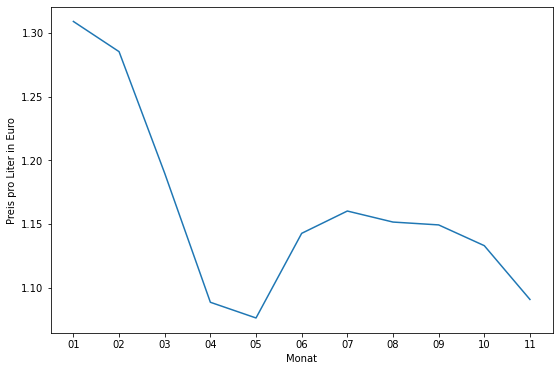

In [764]:
F = plt.gcf()
Size = F.get_size_inches()
F.set_size_inches(Size[0]*1.5, Size[1]*1.5, forward=True)
plt.plot(monthsE10, pricesE10)
plt.xlabel('Monat')
plt.ylabel('Preis pro Liter in Euro')
plt.show()

# Monatlicher Preisverlauf von E5

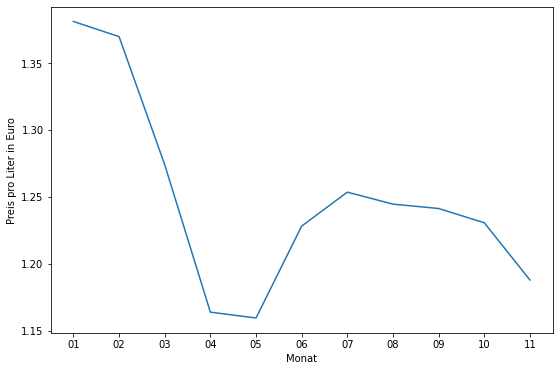

In [766]:
F = plt.gcf()
Size = F.get_size_inches()
F.set_size_inches(Size[0]*1.5, Size[1]*1.5, forward=True)
plt.plot(monthsE5, pricesE5)
plt.xlabel('Monat')
plt.ylabel('Preis pro Liter in Euro')
plt.show()

# Monatlicher Preisverlauf von Diesel

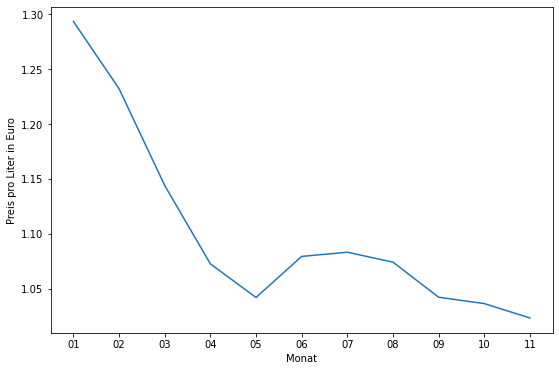

In [781]:
F = plt.gcf()
Size = F.get_size_inches()
F.set_size_inches(Size[0]*1.5, Size[1]*1.5, forward=True)
plt.plot(monthsDiesel, pricesDiesel)
plt.xlabel('Monat')
plt.ylabel('Preis pro Liter in Euro')
plt.show()

### E10, E5 und Diesel im Vergleich

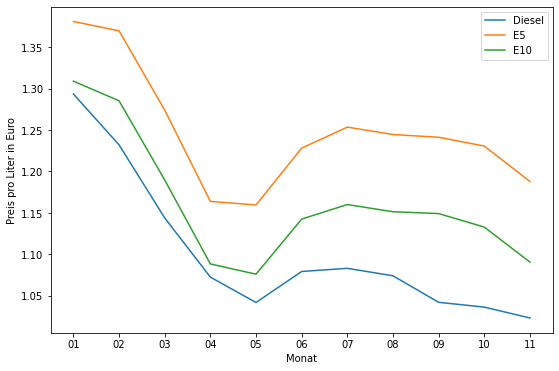

In [782]:
F = plt.gcf()
Size = F.get_size_inches()
F.set_size_inches(Size[0]*1.5, Size[1]*1.5, forward=True)
plt.plot(monthsDiesel, pricesDiesel)
plt.plot(monthsE5, pricesE5)
plt.plot(monthsE10, pricesE10)
plt.legend(['Diesel','E5','E10'])
plt.xlabel('Monat')
plt.ylabel('Preis pro Liter in Euro')
plt.show()

### Average price per day during year

In [783]:
def getPricesPerDayCat(l,date,cat):
    dayPrices = []
    price = 0
    count = 0
    for element in l:
        if element["_id"][0:10] == date:
            dayPrices.append(element[cat])
            price = price + (element[cat])
            count = count + 1
    return dayPrices, (price/count)


def getDates(l):
    dates = []
    for element in l:
        dates.append(element["_id"][0:10])
    a = list(set(dates))
    a.sort()
    return a

def getAvgPricePerDay(l, cat):
    dates = getDates(l)
    priceDict = []
    prices = []
    for date in dates:
        dayPrices, avgPrice = getPricesPerDayCat(l, date, cat)
        priceDict.append({"Tag":date,"Preis":avgPrice })
        prices.append(avgPrice)
    return priceDict, prices, dates

In [800]:
dieselyear, prices, dates = getAvgPricePerDay(pricesDiesel,"diesel")

## Täglicher Preisverlauf von Diesel in 2020

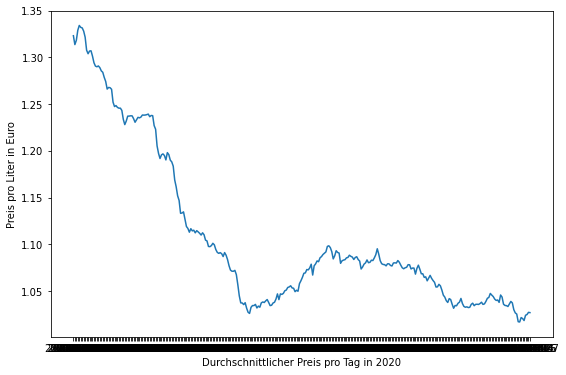

In [788]:
F = plt.gcf()
Size = F.get_size_inches()
F.set_size_inches(Size[0]*1.5, Size[1]*1.5, forward=True)
plt.plot(dates, prices)
plt.xlabel('Durchschnittlicher Preis pro Tag in 2020')
plt.ylabel('Preis pro Liter in Euro')
plt.show()

### Average price during day

In [789]:
def getHours(l):
    hours = []
    for element in l:
        hours.append(element["_id"][11:13])
    a = list(set(hours))
    a.sort()
    return a

def getAvgPriceAtHour(l, date, time, cat):
    price = 0
    count = 0
    for element in l:
        if(element["_id"][0:10] == date):
            if (element["_id"][11:13] == time):
                price = price + element[cat]
                count = count + 1           
    return (price/count)

def getAvgPriceEveryHour(l,date,cat):
    print("Tag: " + date + ", Kategorie: " +cat)
    hours = getHours(l)
    priceDict = []
    prices = []
    for hour in hours:
        hourPrice = getAvgPriceAtHour(l, date, hour, cat)
        priceDict.append({"Stunde": hour, "Preis": hourPrice})
        prices.append(hourPrice)
        print(hour+":00 - "+hour+":59 Uhr | Durchschnittspreis: " + str(hourPrice))
    return priceDict, prices, hours

In [801]:
dayDict, prices, hours = getAvgPriceEveryHour(pricesDiesel, "2020-08-28", "diesel")

Tag: 2020-08-28, Kategorie: diesel
00:00 - 00:59 Uhr | Durchschnittspreis: 1.064284360698193
01:00 - 01:59 Uhr | Durchschnittspreis: 1.0598238095238095
02:00 - 02:59 Uhr | Durchschnittspreis: 1.084625
03:00 - 03:59 Uhr | Durchschnittspreis: 1.0575897435897437
04:00 - 04:59 Uhr | Durchschnittspreis: 1.0612158905741373
05:00 - 05:59 Uhr | Durchschnittspreis: 1.0892248089106191
06:00 - 06:59 Uhr | Durchschnittspreis: 1.1154744425168925
07:00 - 07:59 Uhr | Durchschnittspreis: 1.108845313500346
08:00 - 08:59 Uhr | Durchschnittspreis: 1.088901432412696
09:00 - 09:59 Uhr | Durchschnittspreis: 1.067738488946789
10:00 - 10:59 Uhr | Durchschnittspreis: 1.0934933488724725
11:00 - 11:59 Uhr | Durchschnittspreis: 1.0735629424746904
12:00 - 12:59 Uhr | Durchschnittspreis: 1.0637955688367182
13:00 - 13:59 Uhr | Durchschnittspreis: 1.081256642989739
14:00 - 14:59 Uhr | Durchschnittspreis: 1.0588714100842038
15:00 - 15:59 Uhr | Durchschnittspreis: 1.0422637962227825
16:00 - 16:59 Uhr | Durchschnittspre

# Preisverlauf von Diesel an einem Tag (2020-08-28)

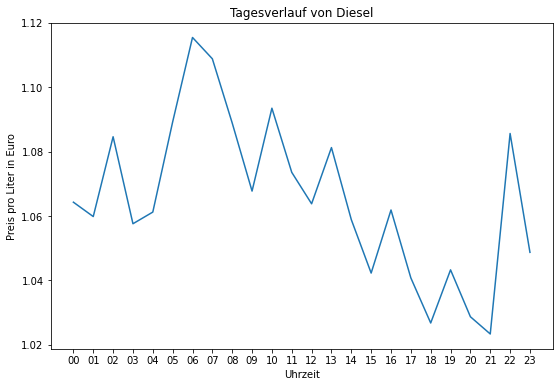

In [802]:
F = plt.gcf()
Size = F.get_size_inches()
F.set_size_inches(Size[0]*1.5, Size[1]*1.5, forward=True)
plt.plot(hours, prices)
plt.xlabel('Uhrzeit')
plt.ylabel('Preis pro Liter in Euro')
plt.title("Tagesverlauf von Diesel")
plt.show()

In [951]:
res = stationen.aggregate([
    { 
        "$match": 
        {
            "$or": [ { "city": "München" }, { "city": "Freiburg" }, { "city": "Frankfurt"}, { "city": "Hamburg"}, { "city": "Berlin"},{ "city": "Köln"}]
        }
    }

])
cityStations = list(res)

In [962]:
def getCities(l):
    cities = []
    for element in l:
        cities.append(element["city"])
    return list(set(cities))

def splitIDforCity(l, cities):
    cityIDs = []
    for city in cities:
        for element in l:
            if element["city"] == city:
                cityIDs.append({"Stadt": city, "ID": element["uuid"]})
    return cityIDs

def getIDsByCity(ids, city):
    cityIDs = []
    for id in ids:
        if id['Stadt'] == city:
            cityIDs.append({"station_uuid": id['ID']})
    return cityIDs


In [965]:
ids = splitIDforCity(cityStations, getCities(cityStations))
ids

[{'Stadt': 'München', 'ID': '0e18d0d3-ed38-4e7f-a18e-507a78ad901d'},
 {'Stadt': 'München', 'ID': 'e2b1503f-6be0-4f7b-979f-b105f3ab28c9'},
 {'Stadt': 'München', 'ID': 'e1a15081-2561-9107-e040-0b0a3dfe563c'},
 {'Stadt': 'München', 'ID': '0055bbb5-2c30-4cb9-89f4-d937cf121770'},
 {'Stadt': 'München', 'ID': 'dfffa0d9-7e31-4dd2-8fec-79af950f13ac'},
 {'Stadt': 'München', 'ID': 'd8670da9-ee86-451c-b78a-87ffe1a5c93a'},
 {'Stadt': 'München', 'ID': '41c5eac2-7a17-46d8-90fe-d0a8c56db5fc'},
 {'Stadt': 'München', 'ID': '41d21507-a552-4311-873a-d0a2143292af'},
 {'Stadt': 'München', 'ID': '8d253362-4f6e-4851-be38-8c9551493d3d'},
 {'Stadt': 'München', 'ID': '00d5c1b0-ad92-428e-b1e0-067d8b8a76bc'},
 {'Stadt': 'München', 'ID': 'eb8ff3b3-6e15-48c7-bb17-0d8fdd1e11ff'},
 {'Stadt': 'München', 'ID': '8d3f8ec1-95ba-42bc-9c9a-79432c2695e3'},
 {'Stadt': 'München', 'ID': 'f4c21018-060e-4d56-88c7-e7caede0d453'},
 {'Stadt': 'München', 'ID': '430f6f71-72cb-4996-9d4b-bb12d1793a92'},
 {'Stadt': 'München', 'ID': 'fb150

In [966]:
munichIds= getIDsByCity(ids, "Frankfurt")
munichIds

[{'station_uuid': 'e1a15081-25b3-9107-e040-0b0a3dfe563c'},
 {'station_uuid': '40afc1e1-388e-48d2-9b4d-3bfc68f6997f'},
 {'station_uuid': '412086bf-c3a0-4dc7-b293-d476f34a9723'},
 {'station_uuid': 'f0cc24c3-eb5d-46f3-a27e-14342843ffa8'},
 {'station_uuid': 'fca0e6f3-9a11-4ba1-ba46-55661136c793'},
 {'station_uuid': '908dbe42-d894-41d6-8725-f8ff0b297a16'},
 {'station_uuid': 'c3a5fc7f-9baf-4166-86d9-1a3f703a4b9b'},
 {'station_uuid': 'c0ae896c-a64e-4190-aab9-1ebf1907d85f'},
 {'station_uuid': 'b096653c-b8e2-4a2e-8561-c24d7b5a19ef'},
 {'station_uuid': 'a6712b01-ce8b-4881-8d6d-3da22be7c9f8'},
 {'station_uuid': 'a568458f-57f0-4e11-a099-aca55ec3b799'},
 {'station_uuid': '9f039206-fd61-4bf6-8635-be525fd73fd8'},
 {'station_uuid': '9c95e6a4-92c7-41b7-88be-f0c53857ec8c'},
 {'station_uuid': '2232abec-675c-4548-8b1a-db072ea45b26'},
 {'station_uuid': '6995b9c0-739f-4f24-9540-eeec54c96457'},
 {'station_uuid': '60919e38-5445-47ce-904c-896338e650e6'},
 {'station_uuid': '5e55a1b7-f2e1-40cb-a2bf-13fb0a2f2884'